# IMPORTATION DES PACKAGES 

In [2]:
#install.packages("Hmisc")
#install.packages("corrplot")
#install.packages("PerformanceAnalytics")
library(Hmisc)
library(corrplot)
library(PerformanceAnalytics)

# IMPORTATION DES DONNÉES

In [3]:
# Charger les données d'entrainement
billets = read.table("billets.csv", sep=";", header=TRUE)

# ANALYSE DESCRIPTIVE DES DONNÉES

In [4]:
dim(billets)

[1] 1500    7

In [5]:
head(billets)

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.46,103.36,103.66,3.77,2.99,113.09
True,172.69,104.48,103.50,4.40,2.94,113.16
True,171.36,103.91,103.94,3.62,3.01,113.51
True,171.73,104.28,103.46,4.04,3.48,112.54
True,172.17,103.74,104.08,4.42,2.95,112.81


# STATISTIQUES UNIVARIEES

## APERÇU GLOBAL

In [6]:
summary(billets)

 is_genuine      diagonal      height_left     height_right     margin_low   
 False: 500   Min.   :171.0   Min.   :103.1   Min.   :102.8   Min.   :2.980  
 True :1000   1st Qu.:171.8   1st Qu.:103.8   1st Qu.:103.7   1st Qu.:4.015  
              Median :172.0   Median :104.0   Median :103.9   Median :4.310  
              Mean   :172.0   Mean   :104.0   Mean   :103.9   Mean   :4.486  
              3rd Qu.:172.2   3rd Qu.:104.2   3rd Qu.:104.2   3rd Qu.:4.870  
              Max.   :173.0   Max.   :104.9   Max.   :105.0   Max.   :6.900  
                                                              NA's   :37     
   margin_up         length     
 Min.   :2.270   Min.   :109.5  
 1st Qu.:2.990   1st Qu.:112.0  
 Median :3.140   Median :113.0  
 Mean   :3.151   Mean   :112.7  
 3rd Qu.:3.310   3rd Qu.:113.3  
 Max.   :3.910   Max.   :114.4  
                                

In [7]:
describe(billets)

billets 

 7  Variables      1500  Observations
--------------------------------------------------------------------------------
is_genuine 
       n  missing distinct 
    1500        0        2 
                      
Value      False  True
Frequency    500  1000
Proportion 0.333 0.667
--------------------------------------------------------------------------------
diagonal 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1500        0      159        1      172   0.3454    171.4    171.6 
     .25      .50      .75      .90      .95 
   171.8    172.0    172.2    172.4    172.5 

lowest : 171.04 171.05 171.13 171.14 171.15, highest: 172.75 172.76 172.89 172.92 173.01
--------------------------------------------------------------------------------
height_left 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1500        0      155        1      104   0.3392    103.5    103.6 
     .25      .50      .75      .90      .95 
   103

## VARIABLE QUALITATIVE : RATIO DE BILLETS VRAIS/FAUX DE NOTRE BASE DE DONNEES

In [8]:
#effectif
#table_dim <- table(billets$is_genuine)
#proportion
#prop.table(table_dim)

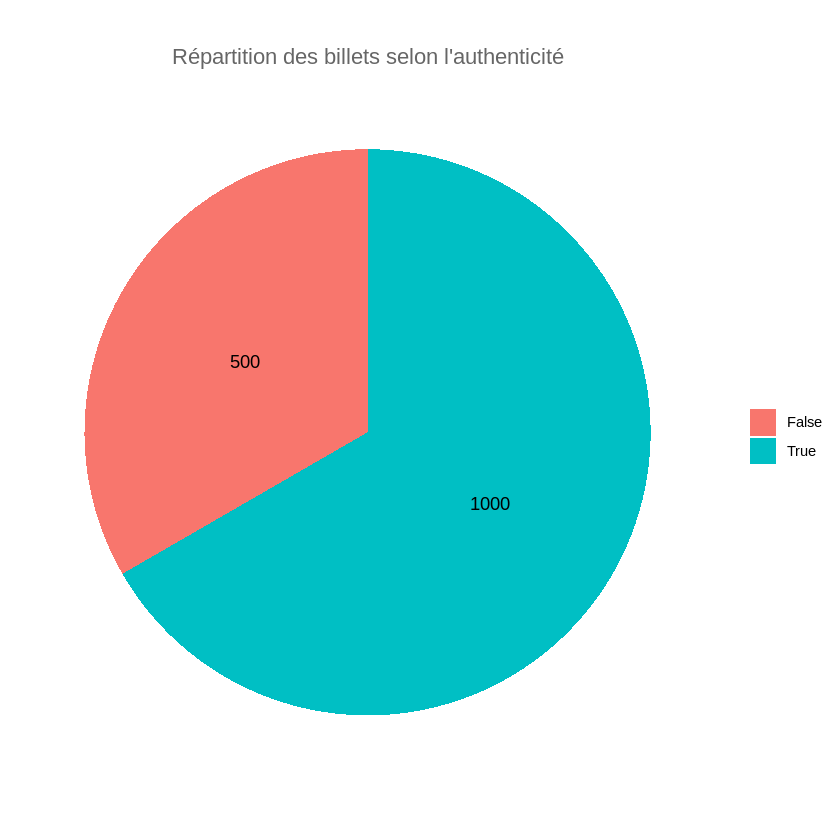

In [8]:
authentique <- billets[['is_genuine']]
vf <- summary(authentique)
vf_df <- as.data.frame(vf)
colnames(vf_df) <- 'freq'
vf_df <- cbind(etat = rownames(vf_df), vf_df)
rownames(vf_df) <- 1:nrow(vf_df)

library(ggplot2)
 
# Create a basic bar
pie = ggplot(vf_df, aes(x="", y=freq, fill=etat)) + geom_bar(stat="identity", width=1)
 
# Convert to pie (polar coordinates) and add labels
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(freq))), position = position_stack(vjust = 0.5)) 

# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "Répartition des billets selon l'authenticité")
 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = 0.5, color = "#666666"))
pie

## VARIABLES QUANTITATIVES : BOXPLOT DES VARIABLES

In [9]:
# On sépare les vrais billets des faux
billets_true <- billets[which(billets$is_genuine %in% "True"),]
billets_false <- billets[which(billets$is_genuine %in% "False"),]

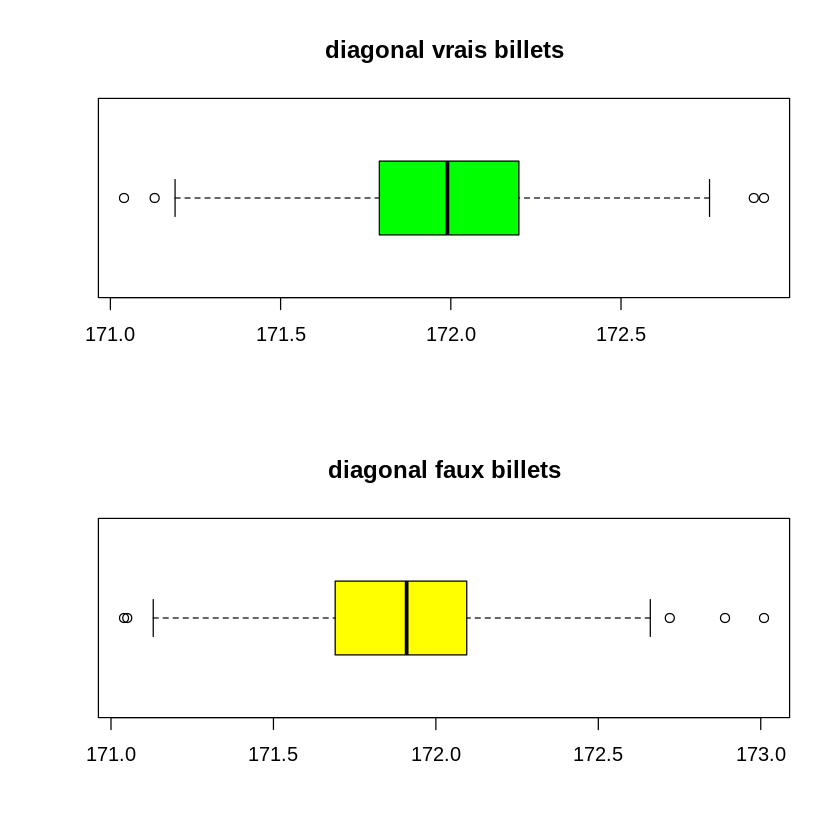

In [10]:
par(mfrow=c(2,1))
boxplot(billets_true$diagonal,col="green", main="diagonal vrais billets", horizontal=TRUE)
boxplot(billets_false$diagonal,col="yellow", main="diagonal faux billets", horizontal=TRUE)

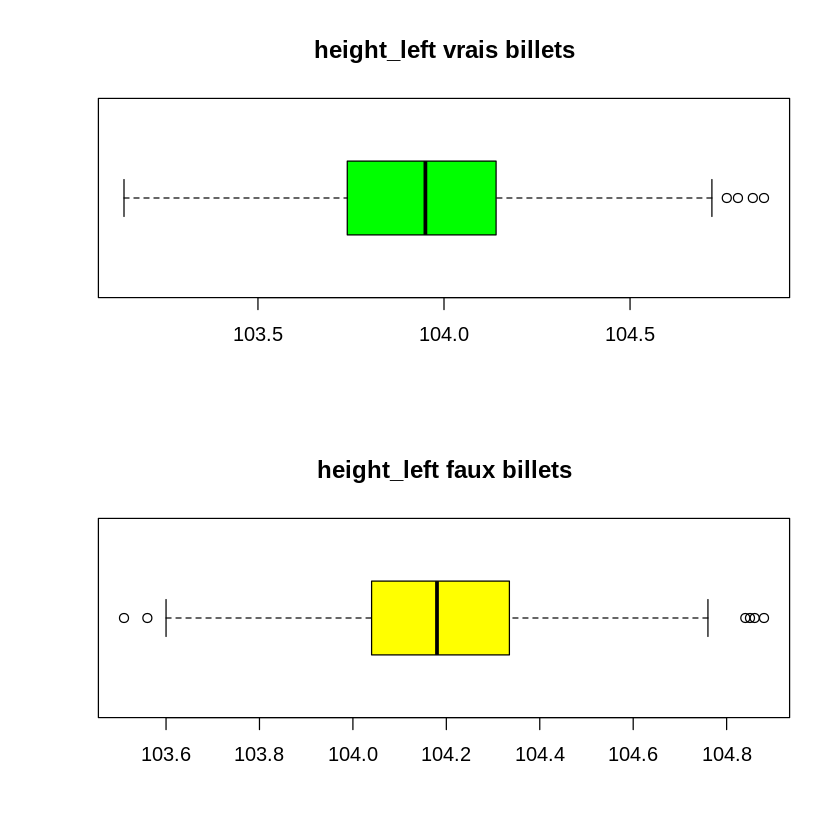

In [11]:
par(mfrow=c(2,1))
boxplot(billets_true$height_left,col="green", main="height_left vrais billets", horizontal=TRUE)
boxplot(billets_false$height_left,col="yellow", main="height_left faux billets", horizontal=TRUE)

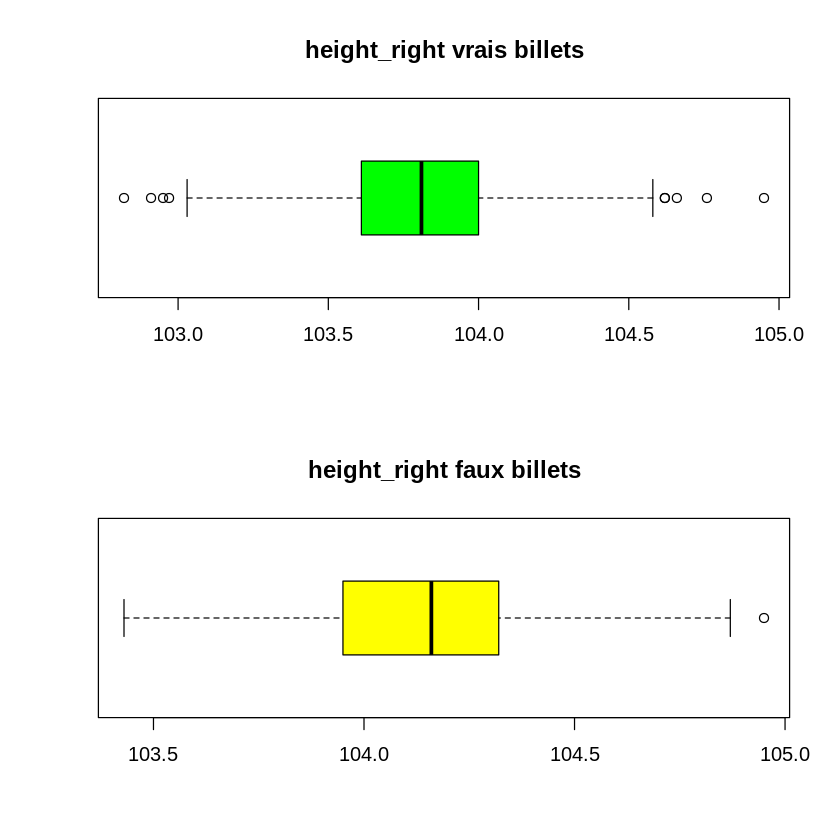

In [12]:
par(mfrow=c(2,1))
boxplot(billets_true$height_right,col="green", main="height_right vrais billets", horizontal=TRUE)
boxplot(billets_false$height_right,col="yellow", main="height_right faux billets", horizontal=TRUE)

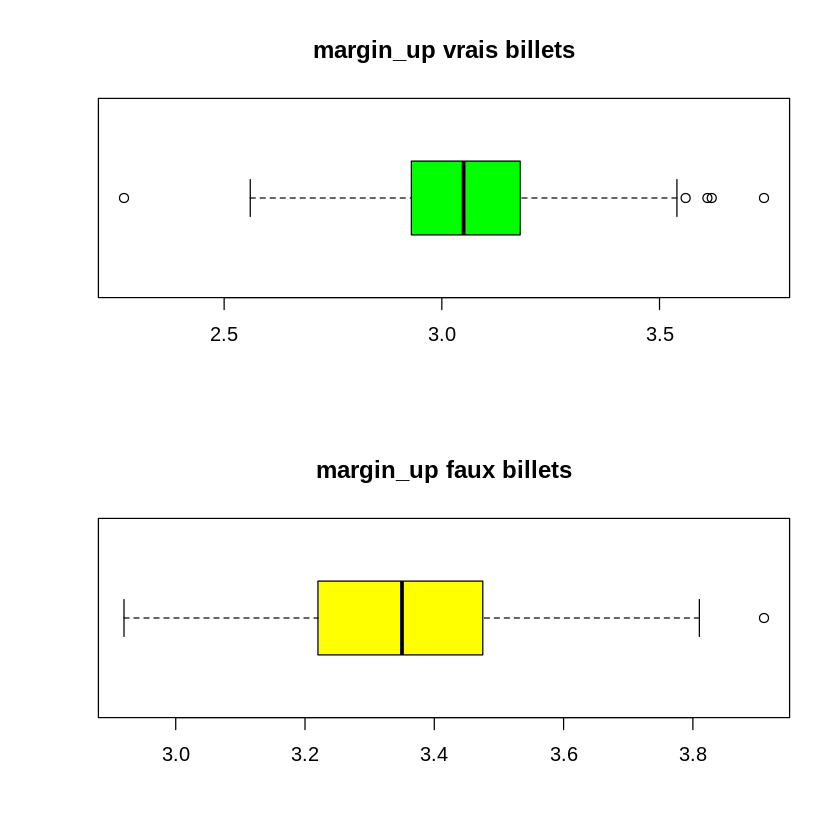

In [13]:
par(mfrow=c(2,1))
boxplot(billets_true$margin_up,col="green", main="margin_up vrais billets", horizontal=TRUE)
boxplot(billets_false$margin_up,col="yellow", main="margin_up faux billets", horizontal=TRUE)

In [14]:
#par(mfrow=c(4,1))
#boxplot(billets$diagonal,col="green", main="diagonal", horizontal=TRUE)
#boxplot(billets$height_left,col="yellow", main="height_left", horizontal=TRUE)
#boxplot(billets$height_right,col="pink", main="height_right", horizontal=TRUE)
#boxplot(billets$margin_up,col="orange", main="margin_up", horizontal=TRUE)

In [120]:
#par(mfrow=c(2,1))
#boxplot(billets$margin_low,col="red", main="margin_low", horizontal=TRUE)
#boxplot(billets$length,col="blue", main="length", horizontal=TRUE)

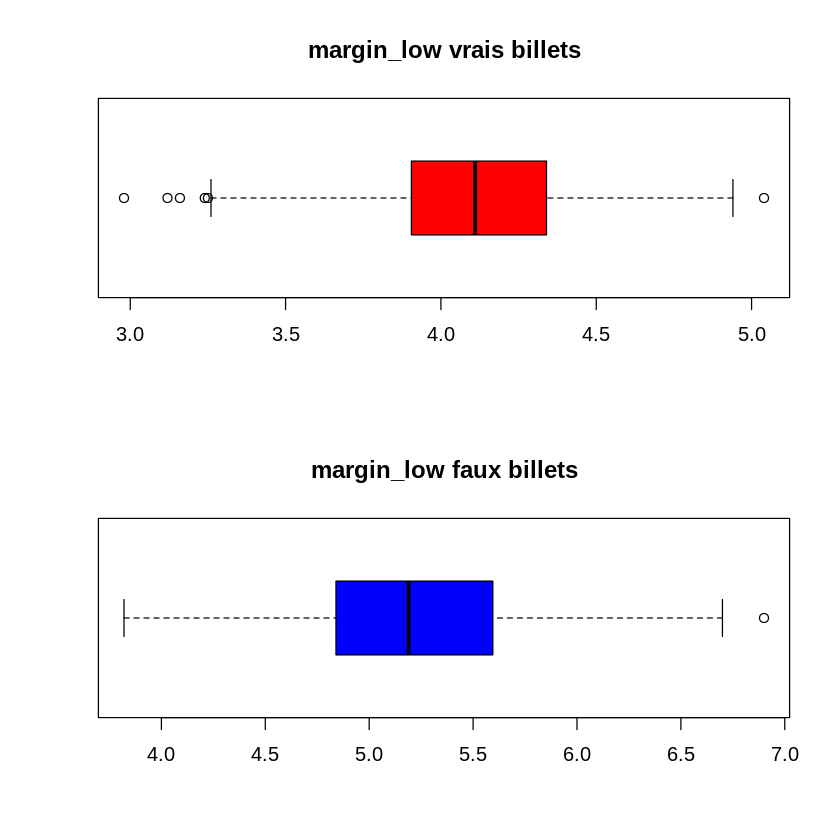

In [15]:
par(mfrow=c(2,1))
boxplot(billets_true$margin_low,col="red", main="margin_low vrais billets", horizontal=TRUE)
boxplot(billets_false$margin_low,col="blue", main="margin_low faux billets", horizontal=TRUE)

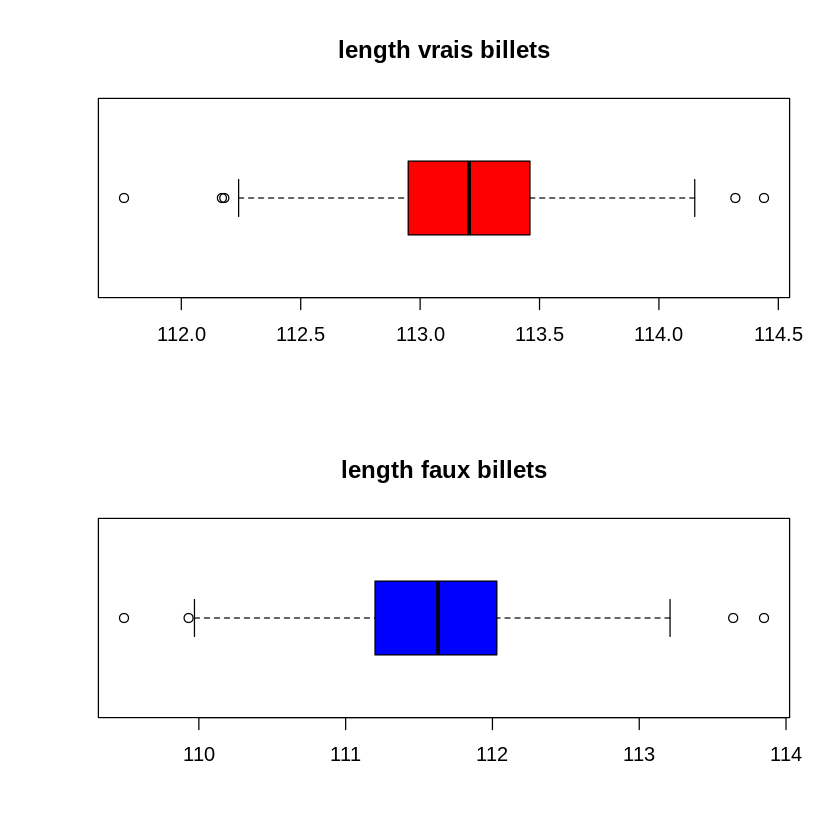

In [16]:
par(mfrow=c(2,1))
boxplot(billets_true$length,col="red", main="length vrais billets", horizontal=TRUE)
boxplot(billets_false$length,col="blue", main="length faux billets", horizontal=TRUE)

# STATISTIQUES BIVARIÉES

## MATRICE DE CORRELATION

In [17]:
#Calcul de la matrice de corrélation
mat_cor = cor(billets[,2:7], use = "complete.obs")
mat_cor

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.00000000,0.01826548,-0.01942814,-0.1115341,-0.05914674,0.1007578
height_left,0.01826548,1.00000000,0.23513162,0.3026430,0.24381218,-0.3143444
height_right,-0.01942814,0.23513162,1.00000000,0.3910851,0.30686721,-0.4042722
margin_low,-0.11153408,0.30264296,0.39108515,1.0000000,0.43160607,-0.6667528
margin_up,-0.05914674,0.24381218,0.30686721,0.4316061,1.00000000,-0.5211389
length,0.10075779,-0.31434436,-0.40427216,-0.6667528,-0.52113891,1.0000000


In [18]:
#rcorr(as.matrix(billets[,2:7]))

In [13]:
#corrplot(mat_cor, order="hclust",
#         tl.col="black", tl.srt=45)

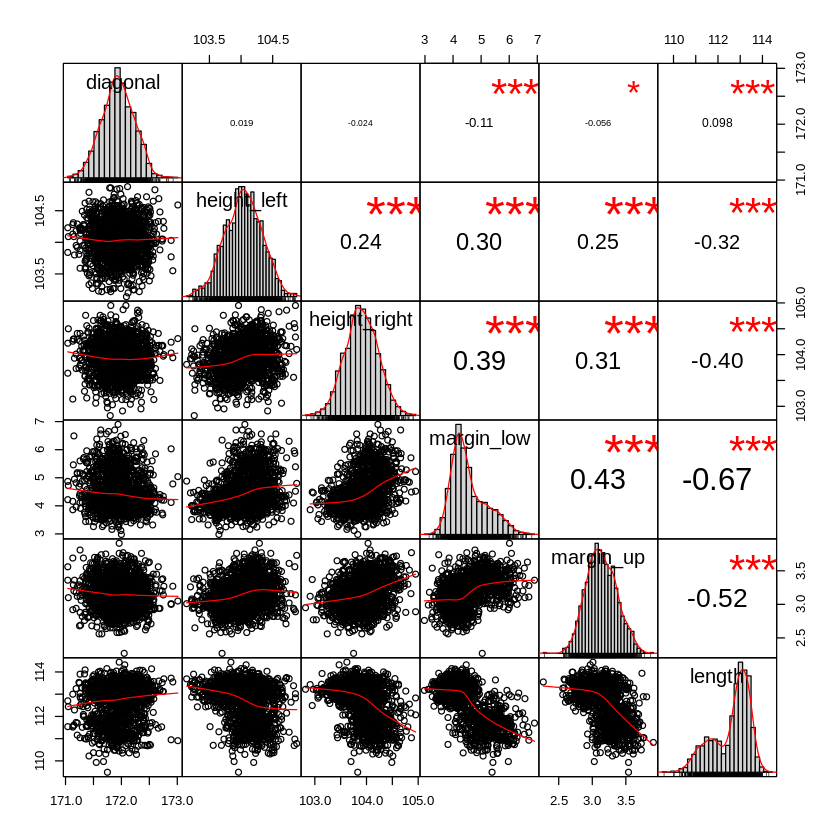

In [19]:
all_data <- billets[, 2:7]
chart.Correlation(all_data, histogram=TRUE, pch=19)

In [125]:
# Application du log sur la colonne margin_low
#billets$log_margin_low <- log(billets$margin_low)
#log_margin_low <- log(billets$margin_low)

In [127]:
# Comparaison des histogrammes entre margin_low et log_margin_low
#par(mfrow=c(1,2))
#hist(billets$margin_low,col="red", main="margin_low")
#hist(billets$log_margin_low,col="blue", main="log_margin_low")

## DIAGRAMME DE DISPERSION ENTRE MARGIN_LOW ET LENGTH

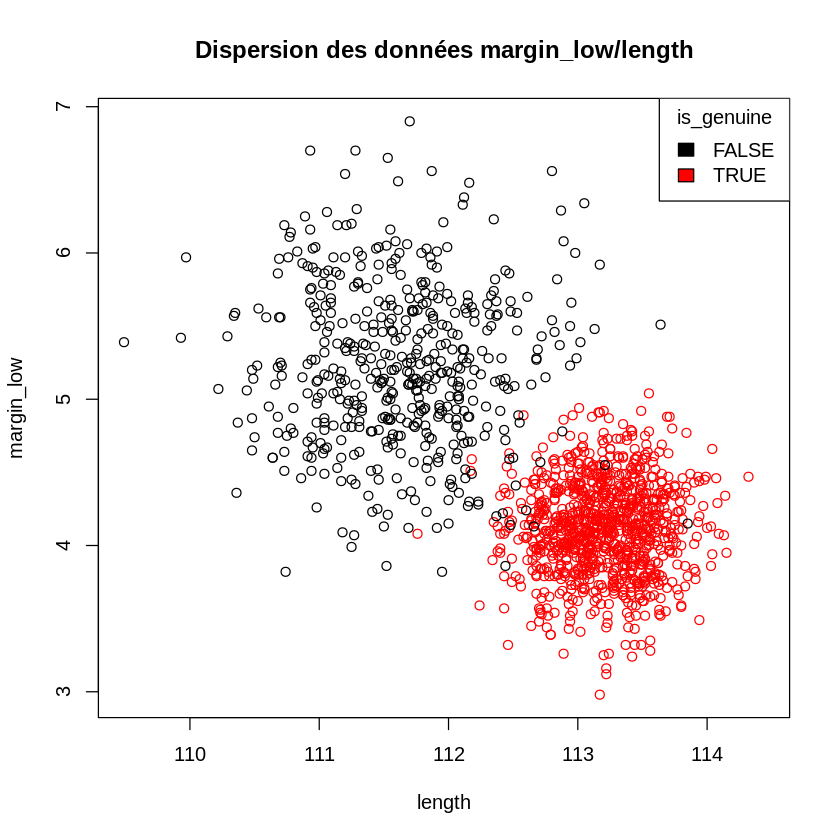

In [20]:
#cor.test(billets$length,billets$margin_low,method="pearson")
plot(billets$length, billets$margin_low, col=billets$is_genuine, main="Dispersion des données margin_low/length", 
     xlab="length", ylab="margin_low")
legend(x="topright", legend=c("FALSE","TRUE"), title="is_genuine", fill=1:2)

## NETTOYAGE DES DONNÉES : SUPRESSION DES VALEURS MANQUANTES

In [21]:
# Extraction des lignes avec NA sur la colonne "margin_low"
billets_with_NA = billets[is.na(billets$margin_low), ]

# Suppression des lignes avec valeures manquantes sur la colonne "margin_low"
billets_without_NA = na.omit(billets)

# APPLICATION DE LA RÉGRESSION LINÉAIRE

In [22]:
# Régression linéaire simple
reg_simp <- lm(margin_low~length,data=billets)
summary(reg_simp)


Call:
lm(formula = margin_low ~ length, data = billets)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64661 -0.33338 -0.04002  0.28766  2.13751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 61.59601    1.67015   36.88   <2e-16 ***
length      -0.50686    0.01482  -34.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4949 on 1461 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.4446,	Adjusted R-squared:  0.4442 
F-statistic:  1169 on 1 and 1461 DF,  p-value: < 2.2e-16


In [23]:
# Régression linéaire multiple
reg_multi <- lm(margin_low~diagonal+height_left+height_right+margin_up+length,data=billets)
summary(reg_multi)


Call:
lm(formula = margin_low ~ diagonal + height_left + height_right + 
    margin_up + length, data = billets)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47234 -0.31707 -0.04168  0.27353  1.97084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.99484    9.65555   2.382  0.01737 *  
diagonal     -0.11106    0.04144  -2.680  0.00744 ** 
height_left   0.18412    0.04477   4.113 4.13e-05 ***
height_right  0.25714    0.04301   5.978 2.84e-09 ***
margin_up     0.25619    0.06437   3.980 7.23e-05 ***
length       -0.40910    0.01808 -22.627  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4807 on 1457 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.4773,	Adjusted R-squared:  0.4755 
F-statistic: 266.1 on 5 and 1457 DF,  p-value: < 2.2e-16


## ÉVALUATION DES HYPOTHÈSES DE VALIDITÉ DES RÉSULTATS

In [24]:
# On calcule la moyenne des résidus
billets_without_NA$residus_s = reg_multi$residuals
mean(billets_without_NA$residus_s)

[1] 3.400369e-18

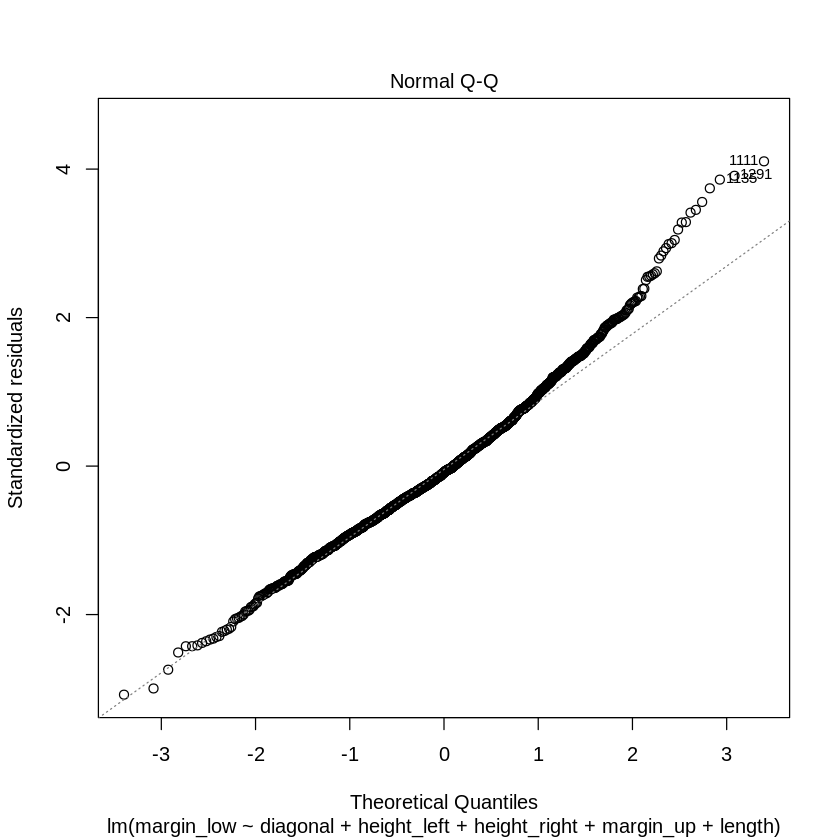

In [25]:
# On test la normalité des résidus
plot(reg_multi, 2)

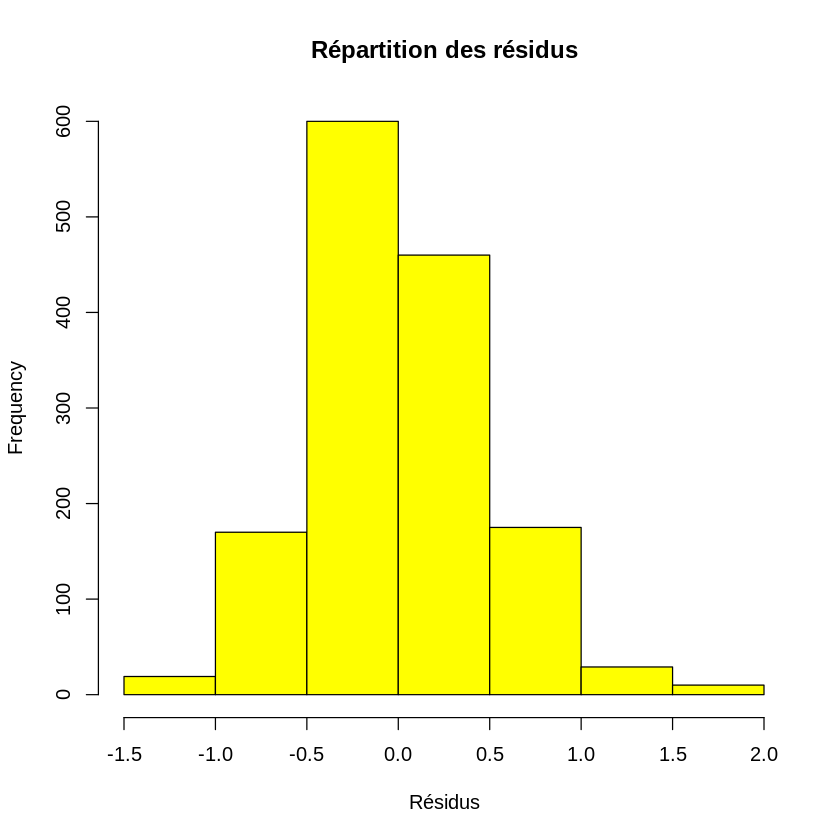

In [26]:
# Tracé de l'histogramme des résidus
hist(reg_multi$residuals, col="yellow",
     main="Répartition des résidus", xlab="Résidus")

In [27]:
# Prédiction des valeurs manquantes
# Cas régréssion simple
# a_prevoir <- data.frame(length=billets_with_NA$length)
# Cas régréssion multiple
a_prevoir <- billets_with_NA[,-5]
margin_low_prev <- predict(reg_multi, a_prevoir, interval="prediction")
margin_low_prev_fit <- round(margin_low_prev[,"fit"], digits=2)
margin_low_prev_fit

73  100  152  198  242  252  285  335  411  414  446  482  506  612  655  676 
4.32 4.39 4.41 4.32 4.65 3.80 4.18 4.13 4.14 4.16 4.18 3.77 4.06 4.30 4.16 4.09 
 711  740  743  781  799  845  846  872  896  920  946  947  982 1077 1122 1177 
4.44 4.47 4.34 4.08 3.61 4.37 4.09 4.25 3.89 3.75 4.24 4.71 4.14 5.05 4.80 5.07 
1304 1316 1348 1436 1439 
5.05 4.78 5.73 5.19 5.14

In [28]:
# Remplacement des valeurs NA par les prévisions dans le data.frame billets
billets_reg_multi <- billets
# Cas RL simple
#billets_reg_simp$log_margin_low[which(is.na(billets$log_margin_low))] <- margin_low_prev_fit
# Cas RL multi
billets_reg_multi$margin_low[which(is.na(billets$margin_low))] <- margin_low_prev_fit

## TRACÉ DU NUAGE DE POINTS + REGRESSION LINÉAIRE SIMPLE

`geom_smooth()` using formula 'y ~ x'


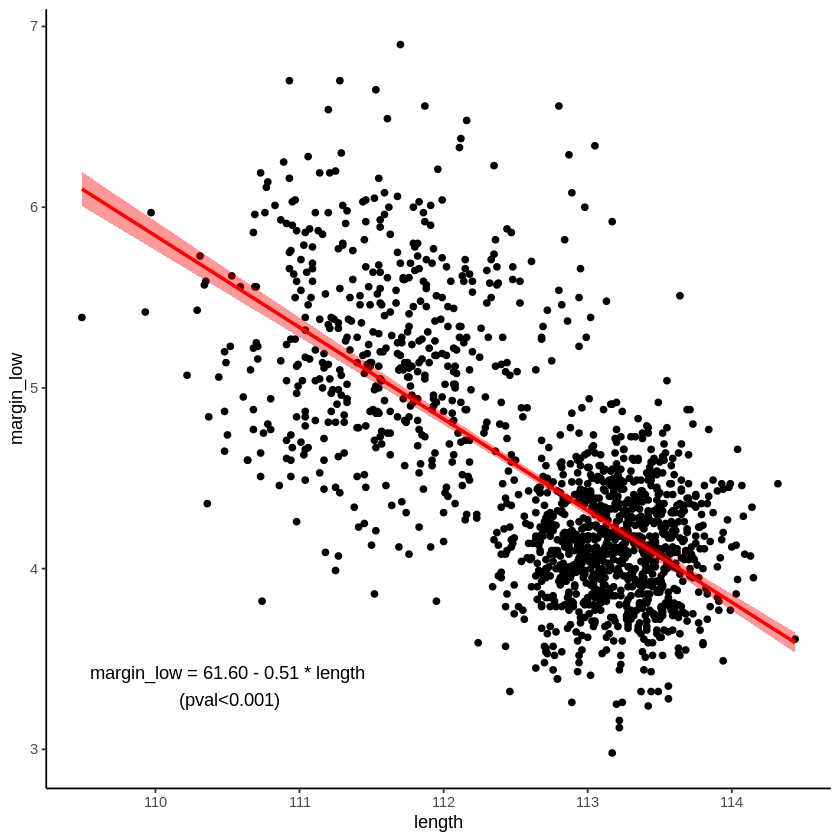

In [29]:
sp <- ggplot(billets_reg_multi,aes(x=length,y=margin_low))+
  geom_point()+
  stat_smooth(colour="red", method="lm", fill="red")+
  xlab("length")+
  ylab("margin_low")+
  theme_classic()+
  annotate("text", x = 110.5, y = 3.35, label = "margin_low = 61.60 - 0.51 * length\n (pval<0.001)") 
sp

# CENTRAGE ET RÉDUCTION DU DATAFRAME

In [38]:
# Centrage et reduction
billets_reg_multi_cr <- scale(billets_reg_multi[,-1])
is_genuine <- as.data.frame(billets_reg_multi$is_genuine)
colnames(is_genuine)[1] <- "is_genuine"

billets_reg_multi_cr_an <- cbind(is_genuine, billets_reg_multi_cr)

# COMPARAISON DES 2 MÉTHODES DE PRÉDICTION

# MÉTHODE K-MEANS

In [39]:
# Installing Packages 
#install.packages("ClusterR") 
#install.packages("cluster") 
#install.packages('caTools')
  
# Loading package 
library(cluster) 
library(caTools)

In [48]:
# On sépare notre jeu de données entre trainingset et testset
split = sample.split(billets_reg_multi_cr_an$is_genuine,
                     SplitRatio = 0.7)
trainingset = subset(billets_reg_multi_cr_an, split == TRUE)
validset = subset(billets_reg_multi_cr_an, split == FALSE)

# ENTRAINEMENT DU MODÈLE À PARTIR DU TRAININGSET

In [79]:
# Fitting K-means clustering Model 
set.seed(240)
# On retire la colonne TRUE/FALSE
trainingset_1 <- trainingset[, -1]
# Centrage et reduction
kmeans.re = kmeans(trainingset_1, centers = 2, nstart = 20)
#kmeans.re

# Identification des clusters pour chaque observation
#kmeans.re$cluster

In [80]:
pred_genuine = kmeans.re$cluster

pred_genuine[pred_genuine == 1] <- 'True'
pred_genuine[pred_genuine == 2] <- 'False'

# Matrice de Confusion
cm_trainingset <- table(pred_genuine, trainingset$is_genuine) 
#data.frame(cm_trainingset)

In [81]:
# On teste la précision de notre modèle de k-means
#install.packages('caret')
#install.packages('rlang')
 
library(caret)
confusionMatrix(cm_trainingset)

Confusion Matrix and Statistics

            
pred_genuine False True
       False   339    5
       True     11  695
                                          
               Accuracy : 0.9848          
                 95% CI : (0.9754, 0.9913)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9656          
                                          
 Mcnemar's Test P-Value : 0.2113          
                                          
            Sensitivity : 0.9686          
            Specificity : 0.9929          
         Pos Pred Value : 0.9855          
         Neg Pred Value : 0.9844          
             Prevalence : 0.3333          
         Detection Rate : 0.3229          
   Detection Prevalence : 0.3276          
      Balanced Accuracy : 0.9807          
                                          
       'Positive' Class : False           
                      

# VALIDATION DES RÉSULTATS AVEC VALIDSET

In [121]:
#install.packages('clue')
library(clue)

validset_1 = validset[,-1]
result <- cl_predict(kmeans.re, validset_1)
result[result == 1] <- 'True'
result[result == 2] <- 'False'
#testset$predict <- result
cm_validset <- table(result, validset$is_genuine)
confusionMatrix(cm_validset)

Confusion Matrix and Statistics

       
result  False True
  False   147    1
  True      3  299
                                          
               Accuracy : 0.9911          
                 95% CI : (0.9774, 0.9976)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9799          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9967          
         Pos Pred Value : 0.9932          
         Neg Pred Value : 0.9901          
             Prevalence : 0.3333          
         Detection Rate : 0.3267          
   Detection Prevalence : 0.3289          
      Balanced Accuracy : 0.9883          
                                          
       'Positive' Class : False           
                                          

In [54]:
# On applique notre kmeans sur la totalité de notre jeu de données
kmeans.re = kmeans(billets_reg_multi_cr_an[,-1], centers = 2, nstart = 20)

# PRÉDICTION DES VRAIS/FAUX BILLETS SUR NOS DONNÉES RÉELLES AVEC LE K MEANS

In [155]:
billets_prod = read.table("billets_production.csv", sep=",", header=TRUE)

In [156]:
dim(billets_prod)

[1] 5 7

In [157]:
summary(billets_prod)

    diagonal      height_left     height_right     margin_low   
 Min.   :171.7   Min.   :103.6   Min.   :103.5   Min.   :3.770  
 1st Qu.:171.8   1st Qu.:104.0   1st Qu.:103.6   1st Qu.:4.440  
 Median :171.9   Median :104.2   Median :104.1   Median :4.990  
 Mean   :172.0   Mean   :104.2   Mean   :104.0   Mean   :4.882  
 3rd Qu.:172.0   3rd Qu.:104.5   3rd Qu.:104.3   3rd Qu.:5.210  
 Max.   :172.5   Max.   :104.6   Max.   :104.3   Max.   :6.000  
   margin_up         length        id   
 Min.   :3.030   Min.   :111.4   A_1:1  
 1st Qu.:3.160   1st Qu.:111.6   A_2:1  
 Median :3.300   Median :112.1   A_3:1  
 Mean   :3.238   Mean   :112.3   A_4:1  
 3rd Qu.:3.310   3rd Qu.:113.2   A_5:1  
 Max.   :3.390   Max.   :113.3          

In [158]:
#On retire la colonne "id" pour avoir un dataset non supervisé. 
billets_prod_1 <- billets_prod[,-7]
billets_prod_1_cr <- scale(billets_prod_1)
#billets_prod_1_cr

In [159]:
#install.packages('clue')
library(clue)

result <- cl_predict(kmeans.re, billets_prod_1_cr)
result[result == 1] <- 'True'
result[result == 2] <- 'False'
billets_prod_1$predict <- result
billets_prod_1

diagonal,height_left,height_right,margin_low,margin_up,length,predict
171.76,104.01,103.54,5.21,3.30,111.42,False
171.87,104.17,104.13,6.00,3.31,112.09,False
172.00,104.58,104.29,4.99,3.39,111.57,False
172.49,104.55,104.34,4.44,3.03,113.20,True
171.65,103.63,103.56,3.77,3.16,113.33,True


# MÉTHODE DE LA RÉGRESSION LOGISTIQUE

# ENTRAINEMENT DU MODÈLE À PARTIR DU TRAININGSET

In [133]:
reg_log <- glm(is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length,
               family="binomial",
               data=trainingset)
#summary(reg_log)

In [134]:
# Sélection automatique du modèle en se basant sur l'AIC
library(MASS)
stepAIC(reg_log)

Start:  AIC=88.61
is_genuine ~ diagonal + height_left + height_right + margin_low + 
    margin_up + length

               Df Deviance     AIC
- diagonal      1   74.735  86.735
- height_left   1   76.494  88.494
<none>              74.607  88.607
- height_right  1   77.245  89.245
- margin_up     1  100.166 112.166
- margin_low    1  169.347 181.347
- length        1  221.072 233.072

Step:  AIC=86.74
is_genuine ~ height_left + height_right + margin_low + margin_up + 
    length

               Df Deviance     AIC
- height_left   1   76.601  86.601
<none>              74.735  86.735
- height_right  1   77.584  87.584
- margin_up     1  101.759 111.759
- margin_low    1  174.430 184.430
- length        1  222.609 232.609

Step:  AIC=86.6
is_genuine ~ height_right + margin_low + margin_up + length

               Df Deviance     AIC
<none>              76.601  86.601
- height_right  1   81.804  89.804
- margin_up     1  105.488 113.488
- margin_low    1  183.080 191.080
- length       


Call:  glm(formula = is_genuine ~ height_right + margin_low + margin_up + 
    length, family = "binomial", data = trainingset)

Coefficients:
 (Intercept)  height_right    margin_low     margin_up        length  
      2.0091       -0.8297       -3.6526       -2.0621        4.6624  

Degrees of Freedom: 1049 Total (i.e. Null);  1045 Residual
Null Deviance:	    1337 
Residual Deviance: 76.6 	AIC: 86.6

In [135]:
# Prédiction des y avec la régression logistique
reg_log_predict = round(reg_log$fitted, 2)

# Création d'un dataset avec valeur du modèle prédit
#billets_reg_multi_cr_an_ypredict = billets_reg_multi_cr_an
#billets_reg_multi_cr_an_ypredict$reg_log_predict <- reg_log_predict

trainingset_ypredict = trainingset
trainingset_ypredict$reg_log_predict <- reg_log_predict

head(trainingset_ypredict)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,reg_log_predict
2,True,-1.6331847,-2.2357896,-0.79940117,-1.08161517,-0.6965669,0.4715090,1.00
3,True,2.3970239,1.5042548,-1.29076079,-0.12655328,-0.9122578,0.5517171,1.00
4,True,-1.9608439,-0.3991607,0.06047818,-1.30901085,-0.6102905,0.9527576,1.00
6,True,0.6931959,-0.9668460,0.49041785,-0.09623385,-0.8691196,0.1506766,0.99
7,True,1.2502166,0.5024572,-0.21591161,0.14632154,0.4681645,0.1506766,0.79
8,True,-0.2570159,-0.9000595,0.49041785,-0.76326120,-0.9985342,0.4600507,1.00


In [136]:
# On applique une condition si p > 0 Vrai sinon faux pour la colonne reg_log_predict pour tester notre modèle
#billets_reg_multi_cr_an_ypredict$reg_log_predict[billets_reg_multi_cr_an_ypredict$reg_log_predict > 0.5] = 'True'
#billets_reg_multi_cr_an_ypredict$reg_log_predict[billets_reg_multi_cr_an_ypredict$reg_log_predict < 0.5] = 'False'

trainingset_ypredict$reg_log_predict[trainingset_ypredict$reg_log_predict >= 0.5] = 'True'
trainingset_ypredict$reg_log_predict[trainingset_ypredict$reg_log_predict < 0.5] = 'False'
head(trainingset_ypredict)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,reg_log_predict
2,True,-1.6331847,-2.2357896,-0.79940117,-1.08161517,-0.6965669,0.4715090,True
3,True,2.3970239,1.5042548,-1.29076079,-0.12655328,-0.9122578,0.5517171,True
4,True,-1.9608439,-0.3991607,0.06047818,-1.30901085,-0.6102905,0.9527576,True
6,True,0.6931959,-0.9668460,0.49041785,-0.09623385,-0.8691196,0.1506766,True
7,True,1.2502166,0.5024572,-0.21591161,0.14632154,0.4681645,0.1506766,True
8,True,-0.2570159,-0.9000595,0.49041785,-0.76326120,-0.9985342,0.4600507,True


In [137]:
truth_genuine = trainingset_ypredict$is_genuine
pred_genuine = trainingset_ypredict$reg_log_predict

# Matrice de Confusion
cm_trainingset <- table(pred_genuine, truth_genuine) 
#data.frame(cm_trainingset)

In [138]:
# On analyse la précision de notre modèle de régression logistique
confusionMatrix(cm_trainingset)

Confusion Matrix and Statistics

            truth_genuine
pred_genuine False True
       False   342    4
       True      8  696
                                          
               Accuracy : 0.9886          
                 95% CI : (0.9801, 0.9941)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9742          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9771          
            Specificity : 0.9943          
         Pos Pred Value : 0.9884          
         Neg Pred Value : 0.9886          
             Prevalence : 0.3333          
         Detection Rate : 0.3257          
   Detection Prevalence : 0.3295          
      Balanced Accuracy : 0.9857          
                                          
       'Positive' Class : False           
         

# VALIDATION DES RÉSULTATS AVEC VALIDSET

In [147]:
# Réalisation de la prédiction
newdata <- as.data.frame(validset[,-1])
predict <- round(predict(reg_log, newdata, type="response"), 2)

predict[predict >= 0.5] <- 'True'
predict[predict < 0.5] <- 'False'

validset_with_predict <- validset
validset_with_predict$predict <- predict
head(validset_with_predict)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,predict
1,True,-0.4863774,2.7731984,3.1621858,0.05536327,-1.1279488,0.1735932,True
5,True,-0.7485048,0.8363897,-1.4136007,-0.67230293,1.4172048,-0.1586975,True
10,True,1.6761736,0.1351314,0.3061580,-0.67230293,0.4250263,0.8840078,True
11,True,-0.4208455,0.3688841,-0.9222411,-2.00635763,0.1230589,0.6204669,True
14,True,0.7914936,1.0701425,-0.7686912,-0.06591443,0.9858228,1.1131738,True
15,True,0.3327707,-0.5327337,-0.2773316,-0.59650437,-0.9985342,0.5860920,True


In [150]:
# Matrice de Confusion
cm_validset <- table(validset_with_predict$predict, validset_with_predict$is_genuine) 
#data.frame(cm_validset)
# On analyse la précision de notre modèle de régression logistique
confusionMatrix(cm_validset)

Confusion Matrix and Statistics

       
        False True
  False   149    0
  True      1  300
                                          
               Accuracy : 0.9978          
                 95% CI : (0.9877, 0.9999)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.995           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9933          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9967          
             Prevalence : 0.3333          
         Detection Rate : 0.3311          
   Detection Prevalence : 0.3311          
      Balanced Accuracy : 0.9967          
                                          
       'Positive' Class : False           
                                          

## GÉNÉRALISATION DU MODÈLE

In [152]:
# Régression logistique sur notre jeu de données entier
reg_log <- glm(is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length,
               family="binomial",
               data=billets_reg_multi_cr_an)

# PRÉDICTION DES VRAIS/FAUX BILLETS AVEC DONNÉES RÉELLES

In [163]:
billets_prod[,-7]

diagonal,height_left,height_right,margin_low,margin_up,length
171.76,104.01,103.54,5.21,3.30,111.42
171.87,104.17,104.13,6.00,3.31,112.09
172.00,104.58,104.29,4.99,3.39,111.57
172.49,104.55,104.34,4.44,3.03,113.20
171.65,103.63,103.56,3.77,3.16,113.33


In [164]:
# Réalisation de la prédiction
newdata <- as.data.frame(scale(billets_prod[,-7]))
predict <- round(predict(reg_log, newdata, type="response")*100, 2)

predict[predict > 50] <- 'True'
predict[predict < 50] <- 'False'

billets_prod_nan <- billets_prod[,-7]
#billets_prod$predict <- predict
billets_prod_nan$predict <- predict
billets_prod_nan

diagonal,height_left,height_right,margin_low,margin_up,length,predict
171.76,104.01,103.54,5.21,3.30,111.42,False
171.87,104.17,104.13,6.00,3.31,112.09,False
172.00,104.58,104.29,4.99,3.39,111.57,False
172.49,104.55,104.34,4.44,3.03,113.20,True
171.65,103.63,103.56,3.77,3.16,113.33,True
